In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
    # The standard datetime time series module
from datetime import timedelta
    # For adding and subtracting time deltas
    
from dateutil.parser import parse
%matplotlib inline 
# THIS LINE MAKES PLOTS SHOW IN JUPYTER

# Key Lessons & Topics


## Very important things learned

- Pandas Series with a DatetimeIndex give access to a new range of datetime functions.
- It's easy to create a DatetimeIndex from a list of standard python datetime values
- Note from other experience: matplotlib does not play well with a DatetimeIndex. 
 - Just pass integer values then reset the xticks to be the values from the DatetimeIndex

- Pandas lets you easily generate date ranges is extremely flexible with frequencies between dates.  See Table 10-4
- pd.date_range() -- much specify two of start, end, periods.
- df.resample('A-DEC').mean()




### Common date and time functions
- Find current timestamp
        datetime.now()

- Datetime object to a string
        str(datetime(2011, 1, 3))
        
- Datetime object to a string with a particular format - format_string follows pattern like '%Y-%m-$d'
        datetime(2011, 1, 3).strftime(format_string)
        
- String --> Datetime.  Need to tell the format of the passed value.
        value = '2011-01-03'
        datetime.strptime(value, '%Y-%m-%d')
        
- An array of strings to dates using list comprehension
        values = ['7/6/2011', '8/6/2011']
        [datetime.strptime(x, '%d/%m/%Y') for x in values]
        
- Create a Pandas datetime index object by passing a list
        datestrs=['7/6/2011', '8/6/2011']
        pd.to_datetime(datestrs)
        
- Pandas Time Series with DatetimeIndex
        dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7), datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
        ts = pd.Series(np.random.randn(6), index=dates)
        ts.index
        # Pandas automatically makes the index a DatetimeIndex because the index values passed were datetime objects
        # Individual index values are recast as Pandas Timestampe objects
        ts.index[0] # Yields a "Timestamp" object
        
- Creating a series with a specific start date and number of periods
        longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
    
        ## That time series can be accessed by passing just a year or year-month
            longer_ts['2001']     # returns all values in year 2001
            longer_ts['2001-05']  # returns all values in month May 2001
        
= Create a Data Frames and slice on its row index
        n = 100
        dates = pd.date_range('1/1/2000', periods = n, freq='W-WED') # Weekly every Wednesday
        long_df = pd.DataFrame(np.random.randn(n,4), index=dates, columns=['Colorado', 'Texas', 'New York', 'Ohio'])
        long_df.ix['5-2001'] # Returns May 2001 values
        
- Convert any time series to a fixed frequency with resample
        ts.resample('D').asfreq()
        
- pd.date_range requires specification of two of start, end, periods.
        ## freq parameter tells which days to sample between the beginning and ending range
        pd.date_range('1/1/2000', '12/1/2000', freq='BM')
        
        ## normalize=True parameter resets the time to midnight of given day
        pd.date_range('5/2/2012 12:56:31', periods=5)
        
- p.to_timestamp converts a Period or other Date-esque object to a timestamp objects
        p = pd.Period('2007-01-01', freq='Q-JAN')
        # Combine operations - e.g. "timestamp at 4 PM on the 2nd to last business day of the quarter"
        (p.asfreq('B', how='end') - 1) # Second to last business day of the month.
        (p.asfreq('B', how='end') - 1).asfreq('T', how='start') # Get 0:00 (midnight) for that day
        (p.asfreq('B', how='end') - 1).asfreq('T', how='start') + 16 * 60 # Add 16 hours.  'T' is based on minutes.
        (p.asfreq('B', how='end') - 1).asfreq('T', how='start').to_timestamp() # Convert to timestamp

### Frequencies 
#### Can pass compound frequencies like '1h30min' or simple frequencies
- pd.date_range('1/1/2000', periods = 10, freq='1H30MIN')
- pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI') 
            # Go CRAZY!!
        
- See Table 10-4 for the long list of understood frequencies.

#### These are optimized around financial use so have ones like "business day" or "last business day of month" or "quarter end"
    
- Time Shifts
  ts.shift(2)
- Loses values punted out, creates NaN values
ts.shift(2, 'D')
- Shifts the index with the values; no NaNs, no loss of data

### Periods and Period Arithmetic
- Period = a data type - represents a time span
- Adding / subtracting by integers will add/subtract by the frequency of their object
- Adding / subtracting two instances of the same frequency will yield integers
 - An error will occur if they have different frequencies

#### Period Index - can serve as an axis index in a time series
- rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
- pd.Series(np.random.randn(6), index=rng)
- Can create the PeriodIndex directly 
 - values = ['2001Q3', '2002Q2', '2003Q1']
 - pd.PeriodIndex(values, freq='Q-DEC')

#### Convert PeriodIndex objects (or Series indexed by such objects) to another frequency with asfreq
- Going from low to high frequency must specify whether to start at beginning or end of low frequency range:
 - p = pd.Period('2007', freq = 'A-DEC')
 - p.asfreq('M', 'start') or pd.asfreq('M', 'end')
- From high --> low frequnecy will by default start at the next instance of the specified frequency:
 - p = pd.Period('Aug-2007', 'M')
 - p.asfreq('A-JUN')
  - Output is "Period('2008', 'A-JUN')" because the next A-JUN would be period ending June, 2008.
- Change a whole PeriodIndex object similarly
 - rng = pd.period_range('2006', '2009', freq='A-DEC')
 - ts = p.Series(np.random.randn(len(rng)), index = rng)
 - ts.asfreq('M', how='start') # Output is a list with [2006-01, 2007-01, 2008-01, 2009-01]

### Quarterly Period Frequencies

- p  = pd.Period('2012Q4', freq='Q-JAN')
 - Q-JAN is the Quarter End (last calendar day of each month) for the year specified.
- Ranges work as expected
 - rng = pd.period_range('2012Q1', '2015Q4', freq='Q-DEC')
- Have fun changing ranges of period any arithmetically feasible date range you want
 - (new_rng = rng.asfreq('B', how='end').asfreq('T', how='start') + 16*60).to_timestamp
  - 4 PM on the last day of each quarter.
  - to_timestamp() gives it a seconds field and sets frequency to 'BQ'
  - Without it the frequency is left as "T" because the last operation done was an asfreq('T')
  - With to_timestamp() Pandas will turn it back into 'BQ' - end of frequency quarter

### Timestamps to Periods (and back)
- A timestamp-indexed time series by default shows the last day of the frequency range of each element
 - rng = pd.date_range(start='1/1/2000', periods = 3, freq='M')
 - ts = pd.Series(np.random.randn(3), index=rng)
   - By default the timestamps will be at the END of the date range specified 
 - pts = ts.to_period()
 - new_ts = pts.to_timestamp()
   - By default the timestamps will be set to the BEGINNING of the period range
   
### PeriodIndex from Arrays
- Roles in a PeriodIndex be set explicitly from DataFrame columns (or any derived Series) where needed
    - index = pd.PeriodIndex(year = data['year'], quarter = data['quarter'], freq='Q-DEC')

## MOST IMPORTANT: Resampling and Frequency Conversion

### The resample() method
**ts.resample('M').mean()** or any other function:
    # Example:
      rng = pd.date_range('1/1/2000', periods=100, freq='D')
      ts = pd.Series(np.random.randn(len(rng)), index=rng)
      # ts.resample('M') creates a DatetimeIndexResampler object, like a GroupBy object
      ts.resample('M').mean()
**NaNs are ignored by the aggregation function like most everywhere else in Pandas**    
     # This is perfectly valid:
     -  ts[::4] = np.NaN
     -  ts.resample('M').mean()
       
**Downsampling - higher --> lower frequency**
- Pay attention to the binning interval:
    - By default the left side of interval is closed & right is open
      - Change that with the "open=" parameter
    - Likewise by default the value of the left side of the interval is used as the label, even is the right side of the interval is what is closed.
    - Similarly can change that with 'label=' parameter
    - **Example:**
      - ts.resample(rule='5min', closed='right', label='right').sum()
- You can avoid ts.resample() by using a slower groupby and lambda if you want to
    - **Example:**
      - ts.resample('M').mean()
      - ts.apply(lambda x: x.month).mean()
      
**Upsampling and Interpolation - lower --> higher frequency**
- By default the lower frequency values are placed in the first bin of the higher frequency area
  - annual_frame.resample('Q').mean().ffill() 
    -  will put the annual values where you expect, with the same value getting put into each of 4 quarters corresponding to the year
  - annual_frame.resample('Q', convention='end').mean().fill()
    -  will put the annual values at the last bin; ffill() means that Q4 for year 1 gets filled to Q1, Q2, Q3 of year 2. 

### Moving Window Functions

#### Rolling mean or rolling any-other-aggregation: examples
- close_px['AAPL'].plot()
- close_px['AAPL'].rolling(window=250).mean().plot()
- close_px['AAPL'].rolling(window=250, min_periods = 10).std().plot(title = 'Rolling mean & STD of past 250 days')

#### Expanding Window Mean: example with a Lambda
- expanding_mean =  lambda x: x.rolling(window = len(x), min_periods=1).mean()
- close_px.apply(expanding_mean)

- #Equivalent to : close_px.apply(lambda x: x.rolling(window = len(x), min_periods =1).mean())

#### Exponentially weighted rolling functions are called differently
- ewma60 = aapl_px.ewm(span = 60).mean()

#### Correlating a Data Frame or Series with another Time Series
- Series:
  - corr = returns['AAPL'].rolling(window = 125, min_periods = 100).corr(spx_rets)
- Data Frame:
  - corr = returns.rolling(window = 125, min_periods = 100).corr(spx_rets)

## Examples with Lots of Data Points

    import time
    t = time.time()
    rng = pd.date_range('1/1/2000', periods = 10**7, freq='1s')
    ts = pd.Series(np.random.randn(len(rng)), index=rng)
    elapsed = time.time() - t
    %timeit ts.resample('15s').ohlc()
    print elapsed
    print ts

## Date & Time Data Types
    datetime.datetime() --> (Y, m, d, H, M, S, u)
    datetime.timedelta() --> (d, s)



### Date Parsing with dateutil library
    from dateutil.parser import parse
    parse('2011-01-03')
    parse('Jan 31, 2017 11:52 PM')
    parse('6/12/2011', dayfirst=True)




# Work

## Date and Time Data Types and Tools - Core Python

In [4]:
### Date and Time Data Types and Tools
now = datetime.now()
now # Units are (year, month, day, hour, minute, second, microseconds)

datetime.datetime(2017, 2, 28, 14, 13, 48, 754374)

In [5]:
# Can access the individual attributes of now in the usual way
now.year, now.month, now.day

(2017, 2, 28)

In [6]:
# Can do arithmetic on datetime objects

delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta  # delta only has methods days and seconds WTF 

datetime.timedelta(926, 56700)

In [7]:
# Can do math between datetime and timedelta objects

start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [8]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

## Converting between string and datetime

In [9]:
# Cast a datetime as a string
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [10]:
# Cast a datetime as a string with a specific format
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [11]:
# Stings to dates
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [12]:
# An array of strings to dates using list comprehension
values = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%d/%m/%Y') for x in values]

[datetime.datetime(2011, 6, 7, 0, 0), datetime.datetime(2011, 6, 8, 0, 0)]

In [13]:
# Use dateutil.parser's methods to parse nearly any common format
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
# Parse a human-readable format
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [15]:
# Pandas to_datetime
datestrs=['7/6/2011', '8/6/2011']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [16]:
# pd.to_datetime will accept empty values and convert them to "NaT"
idx = pd.to_datetime(datestrs + [None])
print idx[2]
print pd.isnull(idx)

NaT
[False False  True]


## Pandas Time Series Basics

In [17]:
# Create a pd.Series with an index of type DatetimeIndex
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7), datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [18]:
# Arithetic operations align dates and then perform the operations
ts + ts[::2]

2011-01-02    1.499278
2011-01-05         NaN
2011-01-07   -0.423893
2011-01-08         NaN
2011-01-10    0.538868
2011-01-12         NaN
dtype: float64

### Indexing, Selection, Subsetting

In [19]:
# You can index a time series like a usual series
stamp = ts.index[2]
ts[stamp]

-0.21194628241023442

In [20]:
# Can be indexed by pasing a interpretable string - Example #1
ts['1/10/2011'] # returns a value even though the form of the index is 2011-01-10

0.26943393518229286

In [21]:
# Can be indexed by pasing a interpretable string - Example #2
ts['20110110'] # returns a value even though the form of the index is 2011-01-10

0.26943393518229286

In [22]:
# Creating a time series from periods and accessing via year or year-month
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
longer_ts['2001-01']
longer_ts['2001-05']

2001-05-01   -0.081129
2001-05-02   -0.898420
2001-05-03   -0.778719
2001-05-04    1.657002
2001-05-05   -0.716253
2001-05-06   -0.387897
2001-05-07    1.795212
2001-05-08   -0.521515
2001-05-09    1.388351
2001-05-10    1.113119
2001-05-11   -0.287403
2001-05-12   -0.668627
2001-05-13    0.799458
2001-05-14    1.095716
2001-05-15   -0.303659
2001-05-16    0.695913
2001-05-17   -2.194253
2001-05-18    0.487104
2001-05-19    1.080047
2001-05-20   -0.269017
2001-05-21   -0.516529
2001-05-22    0.466662
2001-05-23    1.410361
2001-05-24   -0.206501
2001-05-25    0.018548
2001-05-26   -1.362130
2001-05-27   -0.826544
2001-05-28   -0.042379
2001-05-29   -0.329399
2001-05-30   -0.773229
2001-05-31    1.529867
Freq: D, dtype: float64

In [23]:
# Slicing works as before
ts[:datetime(2011, 1, 7)]

2011-01-02    0.749639
2011-01-05    0.363230
2011-01-07   -0.211946
dtype: float64

In [24]:
# You can slice by passing date values that are not in the Series itself because Pandas knows about date ordering
ts['2011-01-03':'2011-01-011']

2011-01-05    0.363230
2011-01-07   -0.211946
2011-01-08   -1.060219
2011-01-10    0.269434
dtype: float64

In [25]:
# Create a Data Frames and slice on its row index
dates = pd.date_range('1/1/2000', periods = 100, freq='W-WED') # Weekly every Wednesday
long_df = pd.DataFrame(np.random.randn(100,4), index=dates, columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.ix['5-2001']

Colorado     Texas  New York      Ohio
2001-05-02 -0.896043 -1.270046  0.467967  0.950341
2001-05-09  0.395353  0.671766  1.204502 -0.316296
2001-05-16  0.596205  0.007674 -2.347813  0.794722
2001-05-23  0.141542 -0.146903  0.928190 -0.712460
2001-05-30 -0.639437 -0.730595  0.440484  0.025586

### Time Series with Duplicate Indices are fine

In [26]:
# Create a DatetimeIndex by passing a list of strings (in a date format).  Some of the strings are duplicated.
dates = pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/2/2000','1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [27]:
# Grouping by a DatetimeIndex requires passing a Level
grouped = dup_ts.groupby(level=0)
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting

In [28]:
# Convert any time series to a fixed frequency with resample
# Note that the Pandas book version I have uses an older version of resample.  
# The modern version of resample is essentially a groupby()
ts.resample('D').asfreq()

2011-01-02    0.749639
2011-01-03         NaN
2011-01-04         NaN
2011-01-05    0.363230
2011-01-06         NaN
2011-01-07   -0.211946
2011-01-08   -1.060219
2011-01-09         NaN
2011-01-10    0.269434
2011-01-11         NaN
2011-01-12    0.138026
Freq: D, dtype: float64

### Generating Date Ranges

In [29]:
# By default, daily date ranges are generated
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [30]:
# Pass the start or end and # of periods 
index_start = pd.date_range('4/1/2012', periods = 20)
index_end = pd.date_range('6/1/2012', periods = 20)
print index_start
print index_end

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2012-06-01', '2012-06-02', '2012-06-03', '2012-06-04',
               '2012-06-05', '2012-06-06', '2012-06-07', '2012-06-08',
               '2012-06-09', '2012-06-10', '2012-06-11', '2012-06-12',
               '2012-06-13', '2012-06-14', '2012-06-15', '2012-06-16',
               '2012-06-17', '2012-06-18', '2012-06-19', '2012-06-20'],
              dtype='datetime64[ns]', freq='D')


In [31]:
# Pass a frequency.  It accepts off-the-wall frequencies like "last business day of month'
pd.date_range('1/1/2000', '12/1/2000', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [32]:
# If timestamps are included with the past dates, then they're preserved in the future dates created
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [33]:
# Reset time information to midnight using "normalize"
pd.date_range(start='5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [34]:
# Typically are referenced by a string alias
    # 'M' --> calendar month end
    # 'Q' --> quarterly
    # 'H' --> Hourly
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [35]:
# Can pass compound frequencies like '1h30min'
pd.date_range('1/1/2000', periods = 10, freq='1H30MIN')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [36]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Use time shifting to calculate changes over time.
- Move data in a time series forward or backward by a pre-specified amount
- By default the date outside the original range is lost, but pass a parameter to shift() to shift the indexes as well

In [37]:
# Create a 4-value time series
ts = pd.Series(np.random.randn(4), index=pd.date_range('1/1/2000', periods = 4, freq='M'))
ts

2000-01-31    0.667983
2000-02-29   -0.142576
2000-03-31   -1.738628
2000-04-30    1.219835
Freq: M, dtype: float64

In [38]:
# ts.shift(1) shifts everything forward by 1 month.
# The 1st index is preserved but its value is a NaN.
# The last index value is popped out of the Series.
ts.shift(1)

2000-01-31         NaN
2000-02-29    0.667983
2000-03-31   -0.142576
2000-04-30   -1.738628
Freq: M, dtype: float64

In [39]:
# Calculate the month-on-month deltas
ts.shift(1) / ts - 1

2000-01-31         NaN
2000-02-29   -5.685094
2000-03-31   -0.917995
2000-04-30   -2.425297
Freq: M, dtype: float64

In [40]:
# Pass freq into shift() to move the indexes as well so no data points are lost.
ts.shift(2, freq='M')

2000-03-31    0.667983
2000-04-30   -0.142576
2000-05-31   -1.738628
2000-06-30    1.219835
Freq: M, dtype: float64

In [41]:
# Passing another frequency shift everything forward by the passed frequency.
ts.shift(3, freq='D')

2000-02-03    0.667983
2000-03-03   -0.142576
2000-04-03   -1.738628
2000-05-03    1.219835
dtype: float64

#### Anchoring date shifts - e.g. Month End and Roll Forward

In [42]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime.now()
now

datetime.datetime(2017, 2, 28, 14, 13, 49, 269867)

In [43]:
# Adding 3 days directly does what you'd expect
now + 3 * Day()

Timestamp('2017-03-03 14:13:49.269867')

In [44]:
# An achored value will roll forward a day to the next date - like setting you to the 0th spot of MonthEnd()
print "The date for the end of this month is: ", now + MonthEnd()

The date for the end of this month is:  2017-03-31 14:13:49.269867


In [45]:
# An anchored offset can be used with "rollforward" or "rollback" but that seems stupid & redundant
offset = MonthEnd()
print "End of this month", offset.rollforward(now)
print "End of last month",offset.rollback(now)

End of this month 2017-02-28 14:13:49.269867
End of last month 2017-02-28 14:13:49.269867


## Time Zones are hard and there is stuff in the book about them.  Check it out later.

In [46]:
See Location 7095

SyntaxError: invalid syntax (<ipython-input-46-1c094fd15da3>, line 1)

### Periods and Period Arithmetic
- Period = a data type - represents a time span
- Adding / subtracting by integers will add/subtract by the frequency of their object
- Adding / subtracting two instances of the same frequency will yield integers
 - An error will occur if they have different frequencies

#### Period Index - can serve as an axis index in a time series
- rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
- pd.Series(np.random.randn(6), index=rng)
- Can create the PeriodIndex directly 
 - values = ['2001Q3', '2002Q2', '2003Q1']
 - pd.PeriodIndex(values, freq='Q-DEC')
 
#### Convert PeriodIndex objects (or Series indexed by such objects) to another frequency with asfreq
- Going from low to high frequency must specify whether to start at beginning or end of low frequency range:
 - p = pd.Period('2007', freq = 'A-DEC')
 - p.asfreq('M', 'start') or pd.asfreq('M', 'end')
- From high --> low frequnecy will by default start at the next instance of the specified frequency:
 - p = pd.Period('Aug-2007', 'M')
 - p.asfreq('A-JUN')
  - Output is "Period('2008', 'A-JUN')" because the next A-JUN would be period ending June, 2008.
- Change a whole PeriodIndex object similarly
 - rng = pd.period_range('2006', '2009', freq='A-DEC')
 - ts = p.Series(np.random.randn(len(rng)), index = rng)
 - ts.asfreq('M', how='start') # Output is a list with [2006-01, 2007-01, 2008-01, 2009-01]

In [47]:
# Year 2007, Annual, finishing in December (i.e. normal year span)
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [48]:
# Adding / subtracting by integers will add/subtract by the frequency of their object
p + 5

Period('2012', 'A-DEC')

In [49]:
# Adding / subtracting two instances of the same frequency will yield integers
pd.Period('2014', freq='A-DEC') - p

7

In [50]:
# An error will occur if they have different frequencies
pd.Period('2014', freq='M') - p

IncompatibleFrequency: Input has different freq=A-DEC from Period(freq=M)

In [ ]:
# Create a PeriodIndex that can serve as an axis index
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

In [ ]:
# Apply the PeriodIndex to the series to create a time series.
pd.Series(np.random.randn(6), index=rng)

In [ ]:
# Create a PeriodIndex directly from a list
values = ['2001Q1', '2002Q2', '2003Q3']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

In [ ]:
# Convert PeriodIndex to another frequency
# Low --> High Frequency
p = pd.Period('2007', freq='A-DEC')
p

In [ ]:
# Convert annual to monthly, beginning with beginning of annual phase
p.asfreq('M', how='start')

In [ ]:
# Convert annual to monthly, beginning with end of annual phase
p.asfreq('M', how='end')

In [ ]:
# High --> Low frequency 
p = pd.Period('Aug-2007', 'M')
p

In [ ]:
# Changed to A-JUN, the period reads '2008' because you're saying the year period that ends with the next June,
# which in this case in June 2008
p.asfreq('A-JUN')

In [ ]:
# Whole ranges rather than individual periods can be changed.  
# Recall a PeriodIndex is just composed of  period start, period end, and a frequency
rng = pd.period_range('2006', '2009', freq='A-DEC')
rng

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

In [ ]:
ts.asfreq('M', how='start')

### Quarterly Period Frequencies

- p  = pd.Period('2012Q4', freq='Q-JAN')
 - Q-JAN is the Quarter End (last calendar day of each month) for the year specified.
- Ranges work as expected
 - rng = pd.period_range('2012Q1', '2015Q4', freq='Q-DEC')
- Have fun changing ranges of period any arithmetically feasible date range you want
 - (new_rng = rng.asfreq('B', how='end').asfreq('T', how='start') + 16*60).to_timestamp
  - 4 PM on the last day of each quarter.
  - to_timestamp() gives it a seconds field and sets frequency to 'BQ'
    - Without it the frequency is left as "T" because the last operation done was an asfreq('T')
    - With to_timestamp() Pandas will turn it back into 'BQ' - end of frequency quarter

In [ ]:
p  = pd.Period('2012Q4', freq='Q-JAN')
# Q-JAN is the Quarter End (last calendar day of each month) for the year specified.
# So Jan 31, 2012
p

In [ ]:
# Verify that by setting the freq to Monthly and pegging to the end of the range
p.asfreq('M', how='end')

In [ ]:
# Combine operations - e.g. "timestamp at 4 PM on the 2nd to last business day of the quarter"
(p.asfreq('B', how='end') - 1) # Second to last business day of the month.
(p.asfreq('B', how='end') - 1).asfreq('T', how='start') # Get 0:00 (midnight) for that day
(p.asfreq('B', how='end') - 1).asfreq('T', how='start') + 16 * 60 # Add 16 hours.  'T' is based on minutes.
(p.asfreq('B', how='end') - 1).asfreq('T', how='start').to_timestamp() # Convert to timestamp

In [ ]:
rng = pd.period_range('2012Q1', '2015Q4', freq='Q-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

In [ ]:
# Change the ranges to 4 PM on the last business day of each month.
new_range = (rng.asfreq('B', how='end').asfreq('T', how='start') + 16*60).to_timestamp()
# to_timestamp() will tell Pandas to figure out a new frequency based on this data
# Without it the frequency is left as "T" because the last operation done was an asfreq('T')
# With to_timestamp() Pandas will turn it back into 'BQ' - end of frequency quarter
ts.index = new_range
ts

### Timestamps to Periods (and back)
- A timestamp-indexed time series by default shows the last day of the frequency range of each element
 - rng = pd.date_range(start='1/1/2000', periods = 3, freq='M')
 - ts = pd.Series(np.random.randn(3), index=rng)
   - By default the timestamps will be at the END of the date range specified 
 - pts = ts.to_period()
 - new_ts = pts.to_timestamp()
   - By default the timestamps will be set to the BEGINNING of the period range

In [ ]:
# A timestamp-indexed time series by default shows the last day of the frequency range of each element
rng = pd.date_range(start='1/1/2000', periods = 3, freq='M')
rng
ts = pd.Series(np.random.randn(3), index=rng)
ts

In [ ]:
# A period-indexed time series hows the period identifier
pts = ts.to_period()
pts

In [ ]:
# When converting back to a timestamp, for some reason Pandas gives you the beginning of the range
pts.to_timestamp()

In [ ]:
# Specify how = 'end' to get the end of the range
pts.to_timestamp(how='end')

### PeriodIndex from Arrays
- Roles in a PeriodIndex be set explicitly from DataFrame columns (or any derived Series) where needed
    - index = pd.PeriodIndex(year = data['year'], quarter = data['quarter'], freq='Q-DEC')

In [ ]:
# Combine year and quarter from different columns
data = pd.read_csv('ch08/macrodata.csv')
data[:5]

In [ ]:
# The role of each data column can be set explicitly in declaring the PeriodIndex object
index = pd.PeriodIndex(year = data['year'], quarter = data['quarter'], freq='Q-DEC')
index
    # freq='Q-DEC' is the default behaviour

In [ ]:
# Set this as a new index
data.index = index
data[:5]

## Resampling and Frequency Conversion

### The resample() method
**ts.resample('M').mean()** or any other function:
    # Example:
      rng = pd.date_range('1/1/2000', periods=100, freq='D')
      ts = pd.Series(np.random.randn(len(rng)), index=rng)
      # ts.resample('M') creates a DatetimeIndexResampler object, like a GroupBy object
      ts.resample('M').mean()
**NaNs are ignored by the aggregation function like most everywhere else in Pandas**    
     # This is perfectly valid:
     -  ts[::4] = np.NaN
     -  ts.resample('M').mean()
       
**Downsampling - higher --> lower frequency**
- Pay attention to the binning interval:
    - By default the left side of interval is closed & right is open
      - Change that with the "open=" parameter
    - Likewise by default the value of the left side of the interval is used as the label, even is the right side of the interval is what is closed.
    - Similarly can change that with 'label=' parameter
    - **Example:**
      - ts.resample(rule='5min', closed='right', label='right').sum()
- You can avoid ts.resample() by using a slower groupby and lambda if you want to
    - **Example:**
      - ts.resample('M').mean()
      - ts.apply(lambda x: x.month).mean()
      
**Upsampling and Interpolation - lower --> higher frequency**
- By default the lower frequency values are placed in the first bin of the higher frequency area
  - annual_frame.resample('Q').mean().ffill() 
    -  will put the annual values where you expect, with the same value getting put into each of 4 quarters corresponding to the year
  - annual_frame.resample('Q', convention='end').mean().fill()
    -  will put the annual values at the last bin; ffill() means that Q4 for year 1 gets filled to Q1, Q2, Q3 of year 2. 

In [65]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts.resample('M').mean()

2000-01-31    0.314278
2000-02-29   -0.032506
2000-03-31    0.115458
2000-04-30    0.323771
Freq: M, dtype: float64

In [66]:
# Pandas ignores NaNs
ts[::4] = np.NaN
ts.resample('M').mean()

2000-01-31    0.309396
2000-02-29    0.084280
2000-03-31    0.326263
2000-04-30    0.494557
Freq: M, dtype: float64

In [67]:
## 1-minute data down-sampled to 5-minutes
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01 00:00:00   -0.772223
2000-01-01 00:01:00    1.251804
2000-01-01 00:02:00   -0.721715
2000-01-01 00:03:00   -0.163932
2000-01-01 00:04:00   -1.211615
2000-01-01 00:05:00    0.720676
2000-01-01 00:06:00   -0.008739
2000-01-01 00:07:00   -1.955317
2000-01-01 00:08:00    0.148772
2000-01-01 00:09:00    1.336654
2000-01-01 00:10:00   -1.777774
2000-01-01 00:11:00   -0.301318
Freq: T, dtype: float64

In [73]:
# Aggregate to 5-minute chunks
# By default the left-bin edge of each chunk is inclusive
ts.resample(rule='5min').sum()

2000-01-01 00:00:00   -1.617681
2000-01-01 00:05:00    0.242047
2000-01-01 00:10:00   -2.079091
Freq: 5T, dtype: float64

In [75]:
# Set the right end of the interval to closed
# Useful if the reported time is the end of a range
ts.resample(rule='5min', closed='right').sum()

1999-12-31 23:55:00   -0.772223
2000-01-01 00:00:00   -0.124782
2000-01-01 00:05:00   -2.256403
2000-01-01 00:10:00   -0.301318
Freq: 5T, dtype: float64

In [77]:
# The labeling is also left-closed by default; can break that
# which makes a lot more sense sometimes
ts.resample(rule='5min', closed='right', label='right').sum()

2000-01-01 00:00:00   -0.772223
2000-01-01 00:05:00   -0.124782
2000-01-01 00:10:00   -2.256403
2000-01-01 00:15:00   -0.301318
Freq: 5T, dtype: float64

In [79]:
# Open-High-Low-Close (OHLC) resampling example.
# OHLC is a compiled function so this is very fast.
ts.resample('5min').ohlc()

open      high       low     close
2000-01-01 00:00:00 -0.772223  1.251804 -1.211615 -1.211615
2000-01-01 00:05:00  0.720676  1.336654 -1.955317  1.336654
2000-01-01 00:10:00 -1.777774 -0.301318 -1.777774 -0.301318

In [11]:
# Downsampling can be achieved less quickly using a GroupBy with a lambda function
rng = pd.date_range('1/1/2000', periods = 100, freq='D')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int64

In [9]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

In [10]:
ts.resample(M').mean()

2000-01-31    15
2000-02-29    45
2000-03-31    75
2000-04-30    95
Freq: M, dtype: int64

In [ ]:
### Upsampling and Interpolation

In [14]:
# A Data Frame indexed by Wednesday dates
frame = pd.DataFrame(np.random.randn(2, 4), index=pd.date_range('1/1/2000',periods=2,freq='W-WED'), columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

Colorado     Texas  New York      Ohio
2000-01-05  0.725968 -0.086166 -2.031101 -1.280773
2000-01-12 -1.359997 -0.497399  0.435078  0.941128

In [27]:
# Upsampling to daily values necessarily leads to missing values
df_daily = frame.resample('D').mean()
df_daily

Colorado     Texas  New York      Ohio
2000-01-05  0.725968 -0.086166 -2.031101 -1.280773
2000-01-06       NaN       NaN       NaN       NaN
2000-01-07       NaN       NaN       NaN       NaN
2000-01-08       NaN       NaN       NaN       NaN
2000-01-09       NaN       NaN       NaN       NaN
2000-01-10       NaN       NaN       NaN       NaN
2000-01-11       NaN       NaN       NaN       NaN
2000-01-12 -1.359997 -0.497399  0.435078  0.941128

In [33]:
# Fill Forward the last non NaN value
frame.resample('D').ffill()

Colorado     Texas  New York      Ohio
2000-01-05  0.725968 -0.086166 -2.031101 -1.280773
2000-01-06  0.725968 -0.086166 -2.031101 -1.280773
2000-01-07  0.725968 -0.086166 -2.031101 -1.280773
2000-01-08  0.725968 -0.086166 -2.031101 -1.280773
2000-01-09  0.725968 -0.086166 -2.031101 -1.280773
2000-01-10  0.725968 -0.086166 -2.031101 -1.280773
2000-01-11  0.725968 -0.086166 -2.031101 -1.280773
2000-01-12 -1.359997 -0.497399  0.435078  0.941128

In [34]:
# Fill Forward only 2 the first two of the NaN values
frame.resample('D').ffill(limit=2)

Colorado     Texas  New York      Ohio
2000-01-05  0.725968 -0.086166 -2.031101 -1.280773
2000-01-06  0.725968 -0.086166 -2.031101 -1.280773
2000-01-07  0.725968 -0.086166 -2.031101 -1.280773
2000-01-08       NaN       NaN       NaN       NaN
2000-01-09       NaN       NaN       NaN       NaN
2000-01-10       NaN       NaN       NaN       NaN
2000-01-11       NaN       NaN       NaN       NaN
2000-01-12 -1.359997 -0.497399  0.435078  0.941128

In [38]:
# Recall that resample is flexible, so our Wednesday
# weekly basis doesn't need to be mapped to Wednesday daily basis
frame.resample('W-THU').ffill()

Colorado     Texas  New York      Ohio
2000-01-06  0.725968 -0.086166 -2.031101 -1.280773
2000-01-13 -1.359997 -0.497399  0.435078  0.941128

In [43]:
#### Resampling with Period indexes works exactly the same when it comes to downsampling.
frame = pd.DataFrame(np.random.randn(24,4) , index = pd.period_range('1/2000','12/2001', freq='M'), columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

Colorado     Texas  New York      Ohio
2000-01  1.228354 -1.017093 -0.885082  0.087482
2000-02 -0.785258  0.500731 -0.715090  0.817825
2000-03 -1.885186 -0.026164  1.107447 -0.026291
2000-04  0.664102  0.466214  1.829015  0.435664
2000-05  0.535991 -1.623143  1.985239  1.393530

In [46]:
# Downsampling requires passing an aggregation
annual_frame = frame.resample('A-DEC').mean()
annual_frame

Colorado     Texas  New York      Ohio
2000 -0.026182  0.184160 -0.045774 -0.009640
2001 -0.161177  0.050329 -0.414487  0.049256

In [67]:
# Upsampling requires choosing the bins
# By default the value is put in the first bin of the upsampled range
# Below, the annual period '2000' is turned into the quarterly periods beginning in 2000-Q1
annual_frame.resample('Q-DEC').mean().ffill()

Colorado     Texas  New York      Ohio
2000Q1 -0.026182  0.184160 -0.045774 -0.009640
2000Q2 -0.026182  0.184160 -0.045774 -0.009640
2000Q3 -0.026182  0.184160 -0.045774 -0.009640
2000Q4 -0.026182  0.184160 -0.045774 -0.009640
2001Q1 -0.161177  0.050329 -0.414487  0.049256
2001Q2 -0.161177  0.050329 -0.414487  0.049256
2001Q3 -0.161177  0.050329 -0.414487  0.049256
2001Q4 -0.161177  0.050329 -0.414487  0.049256

In [68]:
# Specifying convention='end' will start the lower-frequency values at the end of the original period
# This has implications for what Forward-Filling does 
# -- below, the value for the year 2000 is ffill'ed into 2000Q4 - 2001Q3
annual_frame.resample('Q-DEC', convention='end').mean().ffill()

Colorado     Texas  New York      Ohio
2000Q4 -0.026182  0.184160 -0.045774 -0.009640
2001Q1 -0.026182  0.184160 -0.045774 -0.009640
2001Q2 -0.026182  0.184160 -0.045774 -0.009640
2001Q3 -0.026182  0.184160 -0.045774 -0.009640
2001Q4 -0.161177  0.050329 -0.414487  0.049256

## Time Series Plotting

### Time Series Plot with Index Slice
- Plot the original daily data
  - close_px['AAPL'].ix['1/1/2011':'3/31/2011'].plot()

- Plot data resampled to quarterly
  - aapl_q = close_px['AAPL'].resample('Q-DEC').ffill()
  - aapl_q.ix['2009':'2011'].plot()

In [5]:
close_px_all = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[["AAPL","MSFT","XOM"]]
close_px[:10]

AAPL   MSFT    XOM
2003-01-02  7.40  21.11  29.22
2003-01-03  7.45  21.14  29.24
2003-01-06  7.45  21.52  29.96
2003-01-07  7.43  21.93  28.95
2003-01-08  7.28  21.31  28.83
2003-01-09  7.34  21.93  29.44
2003-01-10  7.36  21.97  29.03
2003-01-13  7.32  22.16  28.91
2003-01-14  7.30  22.39  29.17
2003-01-15  7.22  22.11  28.77

In [9]:
# Resample to business days, filling in with the last value where there are gaps
close_px.resample('B').ffill().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


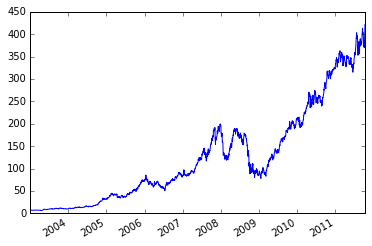

In [12]:
# A plot of al of AAPL
close_px['AAPL'].plot()

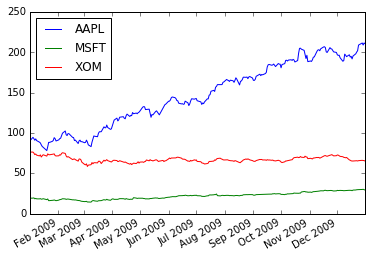

In [13]:
# A plot of all of the stocks in 2009
close_px.ix['2009'].plot()

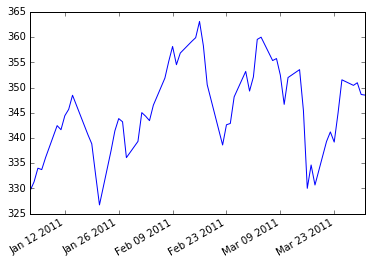

In [16]:
# A plot of AAPL between Jan - March 2011
close_px['AAPL'].ix['1/1/2011':'3/31/2011'].plot()

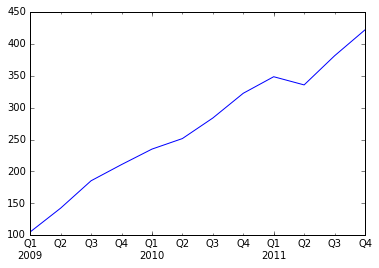

In [20]:
aapl_q = close_px['AAPL'].resample('Q-DEC').ffill()
aapl_q.ix['2009':'2011'].plot()

### Moving Window Functions

#### Rolling mean or rolling any-other-aggregation: examples
- close_px['AAPL'].plot()
- close_px['AAPL'].rolling(window=250).mean().plot()
- close_px['AAPL'].rolling(window=250, min_periods = 10).std().plot(title = 'Rolling mean & STD of past 250 days')

#### Expanding Window Mean: example with a Lambda
- expanding_mean =  lambda x: x.rolling(window = len(x), min_periods=1).mean()
- close_px.apply(expanding_mean)

- #Equivalent to : close_px.apply(lambda x: x.rolling(window = len(x), min_periods =1).mean())

#### Exponentially weighted rolling functions are called differently
- ewma60 = aapl_px.ewm(span = 60).mean()

#### Correlating a Data Frame or Series with another Time Series
- Series:
  - corr = returns['AAPL'].rolling(window = 125, min_periods = 100).corr(spx_rets)
- Data Frame:
  - corr = returns.rolling(window = 125, min_periods = 100).corr(spx_rets)

### Rolling Mean

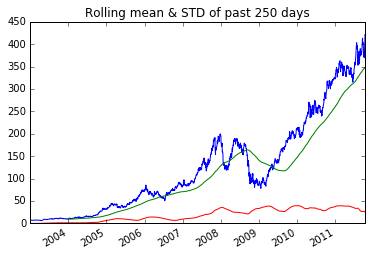

In [66]:
# Original Plot overlaid with rolling mean of past 250 periods
# Rolling mean doesn't start populating until 250 periods.
# STD Uses all periods in existence after period 10, then starts actual rolling mean at period 251.
close_px['AAPL'].plot()
close_px['AAPL'].rolling(window=250).mean().plot()
close_px['AAPL'].rolling(window=250, min_periods = 10).std().plot(title = 'Rolling mean & STD of past 250 days')

### Expanding Window Mean - Example with a Lambda

In [65]:
expanding_mean =  lambda x: x.rolling(window = len(x), min_periods=1).mean()
#close_px.apply(lambda x: x.rolling(window = len(x), min_periods =1).mean())
close_px.apply(expanding_mean)

AAPL       MSFT        XOM
2003-01-02    7.400000  21.110000  29.220000
2003-01-03    7.425000  21.125000  29.230000
2003-01-06    7.433333  21.256667  29.473333
2003-01-07    7.432500  21.425000  29.342500
2003-01-08    7.402000  21.402000  29.240000
2003-01-09    7.391667  21.490000  29.273333
2003-01-10    7.387143  21.558571  29.238571
2003-01-13    7.378750  21.633750  29.197500
2003-01-14    7.370000  21.717778  29.194444
2003-01-15    7.355000  21.757000  29.152000
2003-01-16    7.350909  21.756364  29.129091
2003-01-17    7.325833  21.628333  29.085000
2003-01-21    7.301538  21.516154  28.996923
2003-01-22    7.275714  21.410714  28.895714
2003-01-23    7.263333  21.352667  28.804000
2003-01-24    7.240625  21.242500  28.686875
2003-01-27    7.230588  21.129412  28.541176
2003-01-28    7.233889  21.021111  28.450000
2003-01-29    7.246316  20.946842  28.420000
2003-01-30    7.242000  20.847000  28.367500
2003-01-31    7.239048  20.742381  28.356190
2003-02-03    7.243182  20.666818  28.363636
2003-02-04    7.245652  20.576522  28.370435
2003-02-05    7.244583  20.487917  28.359583
2003-02-06    7.243600  20.413600  28.340000
2003-02-07    7.236923  20.332308  28.313846
2003-02-10    7.234815  20.268889  28.297407
2003-02-11    7.232857  20.196786  28.275000
2003-02-12    7.231724  20.129655  28.235172
2003-02-13    7.233000  20.074000  28.209667
...                ...        ...        ...
2011-09-02  121.973103  23.916792  59.376993
2011-09-06  122.091020  23.917521  59.382379
2011-09-07  122.210745  23.918473  59.388903
2011-09-08  122.330457  23.919525  59.395041
2011-09-09  122.447017  23.920356  59.400347
2011-09-12  122.564594  23.921256  59.406027
2011-09-13  122.684199  23.922223  59.411616
2011-09-14  122.805830  23.923399  59.417651
2011-09-15  122.929020  23.924797  59.424305
2011-09-16  123.055533  23.926253  59.431199
2011-09-19  123.187002  23.927749  59.437699
2011-09-20  123.319180  23.929139  59.444335
2011-09-21  123.450642  23.930077  59.450036
2011-09-22  123.577288  23.930591  59.454490
2011-09-23  123.704948  23.931105  59.458972
2011-09-26  123.831977  23.931791  59.464545
2011-09-27  123.957115  23.932581  59.470654
2011-09-28  124.081117  23.933329  59.476376
2011-09-29  124.202084  23.934017  59.482914
2011-09-30  124.318743  23.934451  59.488879
2011-10-03  124.432249  23.934721  59.494168
2011-10-04  124.544701  23.935358  59.500213
2011-10-05  124.659656  23.936244  59.506760
2011-10-06  124.774108  23.937332  59.513274
2011-10-07  124.885029  23.938379  59.519633
2011-10-10  125.004452  23.939738  59.527217
2011-10-11  125.128960  23.941122  59.534790
2011-10-12  125.254213  23.942486  59.542758
2011-10-13  125.382174  23.943949  59.550362
2011-10-14  125.516147  23.945452  59.558744

[2214 rows x 3 columns]

#### Exponentially-weighted functions
#### 60-day moving average of AAPL v. 60 day exponentially-weighted average

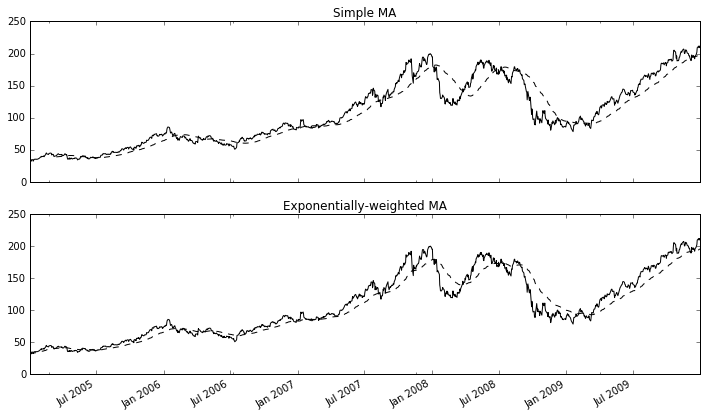

In [88]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, sharex=True, sharey=True, figsize=(12,7))
aapl_px = close_px['AAPL'].ix['2005':'2009']
ma60 = aapl_px.rolling(60, min_periods=50).mean()
ewma60 = aapl_px.ewm(span = 60).mean()

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
axes[0].set_title('Simple MA')

aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[1].set_title('Exponentially-weighted MA')

#### Binary Moving Window Functions - Rolling Correlations

#### A single Time Series correlated with another Time Series

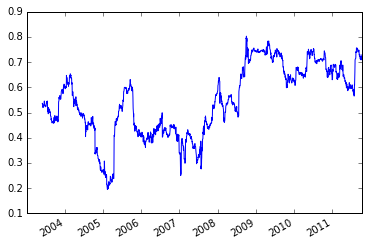

In [121]:
# Recall close_px is the close_px_all excluding close_px_all['SPX']
# window : int.  Size of the moving window. This is the number of observations used for calculating the statistic.
spx_px = close_px_all['SPX']
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = returns['AAPL'].rolling(window = 125, min_periods = 100).corr(spx_rets)
corr.plot()

#### A Data Frame of Times Series all correlated with another Time Series

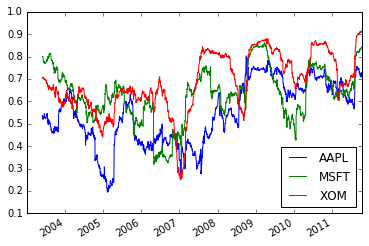

In [130]:
corr = returns.rolling(window = 125, min_periods = 100).corr(spx_rets)
corr.plot()

#### User-defined moving window functions

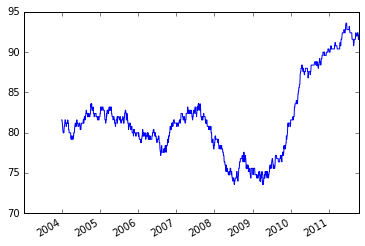

In [131]:
# percentileofscore is asking for the % of days where the return was greater than 2%
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns['AAPL'].rolling(window = 250).apply(score_at_2percent)
result.plot()

## Examples with Lots of Data Points

    import time
    t = time.time()
    rng = pd.date_range('1/1/2000', periods = 10**7, freq='1s')
    ts = pd.Series(np.random.randn(len(rng)), index=rng)
    elapsed = time.time() - t
    %timeit ts.resample('15s').ohlc()
    print elapsed
    print ts

In [159]:
# 10 million data points - < 0.5 seconds
import time
t = time.time()
# do stuff
rng = pd.date_range('1/1/2000', periods = 10**7, freq='10ms')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
elapsed = time.time() - t
print elapsed
print ts

0.40491104126
2000-01-01 00:00:00.000   -1.320886
2000-01-01 00:00:00.010   -0.887580
2000-01-01 00:00:00.020    1.289652
2000-01-01 00:00:00.030    0.044861
2000-01-01 00:00:00.040   -0.206022
2000-01-01 00:00:00.050   -1.805050
2000-01-01 00:00:00.060   -0.692009
2000-01-01 00:00:00.070    0.101704
2000-01-01 00:00:00.080   -0.034355
2000-01-01 00:00:00.090   -2.144375
2000-01-01 00:00:00.100    1.157647
2000-01-01 00:00:00.110    0.960044
2000-01-01 00:00:00.120    2.762541
2000-01-01 00:00:00.130   -1.539131
2000-01-01 00:00:00.140    0.845255
2000-01-01 00:00:00.150    0.134844
2000-01-01 00:00:00.160    0.744749
2000-01-01 00:00:00.170   -1.447880
2000-01-01 00:00:00.180    0.452644
2000-01-01 00:00:00.190    0.462704
2000-01-01 00:00:00.200   -0.290137
2000-01-01 00:00:00.210   -0.006402
2000-01-01 00:00:00.220    0.095863
2000-01-01 00:00:00.230   -0.119607
2000-01-01 00:00:00.240    0.073333
2000-01-01 00:00:00.250    0.827016
2000-01-01 00:00:00.260    1.142897
2000-01-01 00:

In [161]:
ts.resample('15min').ohlc().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 2000-01-01 00:00:00 to 2000-01-02 03:45:00
Freq: 15T
Data columns (total 4 columns):
open     112 non-null float64
high     112 non-null float64
low      112 non-null float64
close    112 non-null float64
dtypes: float64(4)
memory usage: 4.4 KB


In [162]:
%timeit ts.resample('15min').ohlc()

10 loops, best of 3: 101 ms per loop


In [166]:
# More data points, less frequent resample
import time
t = time.time()
rng = pd.date_range('1/1/2000', periods = 10**7, freq='1s')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
elapsed = time.time() - t
%timeit ts.resample('15s').ohlc()
print elapsed
print ts

10 loops, best of 3: 133 ms per loop
0.459925889969
2000-01-01 00:00:00   -0.617542
2000-01-01 00:00:01   -0.171995
2000-01-01 00:00:02    0.241689
2000-01-01 00:00:03   -1.901163
2000-01-01 00:00:04    0.065067
2000-01-01 00:00:05    0.088252
2000-01-01 00:00:06   -1.023831
2000-01-01 00:00:07   -0.197428
2000-01-01 00:00:08    1.198171
2000-01-01 00:00:09   -1.566919
2000-01-01 00:00:10    0.452956
2000-01-01 00:00:11    0.600713
2000-01-01 00:00:12   -0.968072
2000-01-01 00:00:13    1.919102
2000-01-01 00:00:14    1.909321
2000-01-01 00:00:15   -1.328199
2000-01-01 00:00:16   -0.503042
2000-01-01 00:00:17   -0.149613
2000-01-01 00:00:18   -0.572926
2000-01-01 00:00:19    1.917136
2000-01-01 00:00:20    0.253386
2000-01-01 00:00:21    1.062256
2000-01-01 00:00:22    0.684441
2000-01-01 00:00:23   -1.575949
2000-01-01 00:00:24   -1.382910
2000-01-01 00:00:25   -2.104703
2000-01-01 00:00:26   -0.471287
2000-01-01 00:00:27    1.120455
2000-01-01 00:00:28    1.709069
2000-01-01 00:00:29 